In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import plot_barscatter_ax

In [2]:
results = pd.read_csv('results/binary/results.csv')

In [3]:
base_brier = results.base_brier.mean()
print('Mean Brier score absolute improvement:')
print('--- TS ---')
print(f'Ours:        {results.ts_brier.mean() - base_brier:.5f}')
print(f'Probmetrics: {results.prob_ts_brier.mean() - base_brier:.5f}')
print(f'Guo et al.:  {results.guo_ts_brier.mean() - base_brier:.5f}')
print('--- AS ---')
print(f'Ours:        {results.as_brier.mean() - base_brier:.5f}')
print('--- QS ---')
print(f'Ours:        {results.qs_brier.mean() - base_brier:.5f}')

Mean Brier score absolute improvement:
--- TS ---
Ours:        -0.00184
Probmetrics: -0.00181
Guo et al.:  0.00633
--- AS ---
Ours:        -0.00261
--- QS ---
Ours:        -0.00341


In [4]:
base_logloss = results.base_logloss.mean()
print('Mean logloss absolute improvement:')
print('--- TS ---')
print(f'Ours:        {results.ts_logloss.mean() - base_logloss:.5f}')
print(f'Probmetrics: {results.prob_ts_logloss.mean() - base_logloss:.5f}')
print(f'Guo et al.:  {results.guo_ts_logloss.mean() - base_logloss:.5f}')
print('--- AS ---')
print(f'Ours:        {results.as_logloss.mean() - base_logloss:.5f}')
print('--- QS ---')
print(f'Ours:        {results.qs_logloss.mean() - base_logloss:.5f}')

Mean logloss absolute improvement:
--- TS ---
Ours:        -0.01413
Probmetrics: -0.01669
Guo et al.:  0.00426
--- AS ---
Ours:        -0.01538
--- QS ---
Ours:        -0.01803


In [5]:
print('Total runtime:')
print('-- TS --')
print(f'sklearn:     {results.ts_time.sum():.5f}')
print(f'Probmetrics: {results.prob_ts_time.sum():.5f}')
print(f'Guo et al.:  {results.guo_ts_time.sum():.5f}')
print('-- AS --')
print(f'sklearn:     {results.as_time.sum():.5f}')
print('-- QS --')
print(f'sklearn:     {results.qs_time.sum():.5f}')

Total runtime:
-- TS --
sklearn:     2.03560
Probmetrics: 5.69255
Guo et al.:  32.82818
-- AS --
sklearn:     7.74383
-- QS --
sklearn:     16.01811


In [6]:
df = pd.DataFrame()

df['dataset'] = results.dataset

for metric in ['brier', 'logloss', 'ece-15']:
    # "rel" stands for relative improvement (measured in %)
    base = results[f'base_{metric}']
    df[f'guo_ts_{metric}_rel'] = 100.0 * (results[f'guo_ts_{metric}'] / base - 1.0)
    df[f'prob_ts_{metric}_rel'] = 100.0 * (results[f'prob_ts_{metric}'] / base - 1.0)
    df[f'ts_{metric}_rel'] = 100.0 * (results[f'ts_{metric}'] / base - 1.0)
    df[f'as_{metric}_rel'] = 100.0 * (results[f'as_{metric}'] / base - 1.0)
    df[f'qs_{metric}_rel'] = 100.0 * (results[f'qs_{metric}'] / base - 1.0)

df = df.groupby('dataset').agg('mean')

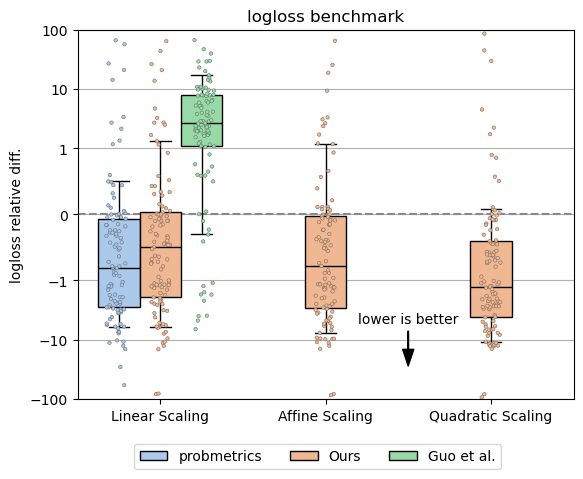

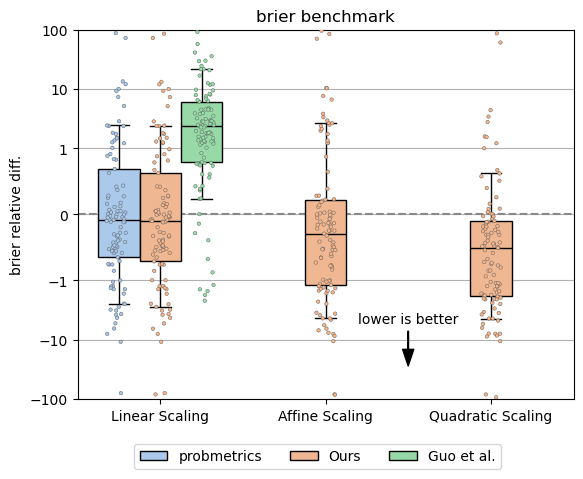

In [7]:
for metric in ['logloss', 'brier']:

    table = pd.DataFrame(columns=['hue', 'label', 'value'])
    for i in range(len(df)):
        table.loc[len(table)] = ['prob', 'Linear Scaling', df.iloc[i][f'prob_ts_{metric}_rel']]
        table.loc[len(table)] = ['ours', 'Linear Scaling', df.iloc[i][f'ts_{metric}_rel']]
        table.loc[len(table)] = ['ours', 'Affine Scaling', df.iloc[i][f'as_{metric}_rel']]
        table.loc[len(table)] = ['ours', 'Quadratic Scaling', df.iloc[i][f'qs_{metric}_rel']]
        table.loc[len(table)] = ['guo', 'Linear Scaling', df.iloc[i][f'guo_ts_{metric}_rel']]

    fig, ax = plt.subplots()
    plot_barscatter_ax(ax, table, title=f'{metric} benchmark', ylabel=f'{metric} relative diff.')
    plt.ylim((-100.0, 100.0))

    # Coordinates where the arrow will point
    x_arrow = 1.5
    y_arrow = -30.0

    # Add downward arrow and text
    ax.annotate(
        'lower is better',
        xy=(x_arrow, y_arrow), # arrow tip
        xytext=(0, 30),
        textcoords='offset points',
        arrowprops=dict(facecolor='black', shrink=0.05, width=.5, headwidth=8),
        fontsize=10,
        ha='center',
        va='bottom'
    )

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.figlegend(handles, ('probmetrics', 'Ours', 'Guo et al.'), loc='lower center', bbox_to_anchor=(0.5, -.05), ncol=5)

    plt.savefig(f'figures/binary_benchmark_{metric}.pdf', bbox_inches='tight')
    plt.show()

In [8]:
# Prepare data
times = {}
n = len(results)
for method in ['guo_ts', 'prob_ts', 'ts', 'as', 'qs']:
    # Average time per 1000 samples.
    times[f'{method}_mean'] = (1000.0 * results[f'{method}_time'] / results.cal_size).mean()
    times[f'{method}_sem'] = (1000.0 * results[f'{method}_time'] / results.cal_size).std() / np.sqrt(n / 3)

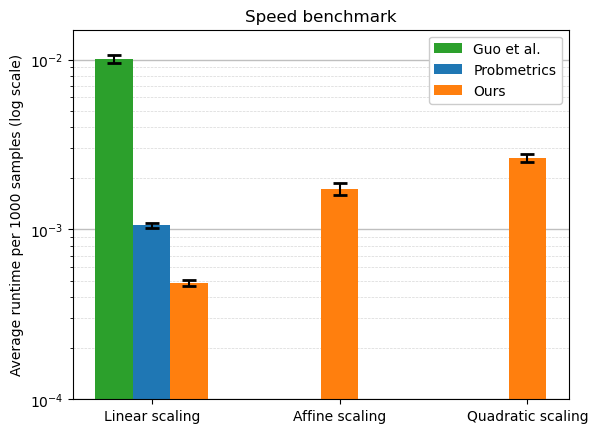

In [9]:
fig, ax = plt.subplots()

categories = ['Linear scaling', 'Affine scaling', 'Quadratic scaling']
x = np.arange(len(categories))
width = 0.2

# Bar plot: runtime (log scale)
ax.bar(0 - 1.0*width, times['guo_ts_mean'], width, color='tab:green', label='Guo et al.')
ax.bar(0 - 0.0*width, times['prob_ts_mean'], width, color='tab:blue', label='Probmetrics')
ax.bar(0 + 1.0*width, times['ts_mean'], width, color='tab:orange', label='Ours')
ax.bar(1 + 0.0*width, times['as_mean'], width, color='tab:orange')
ax.bar(2 + 0.0*width, times['qs_mean'], width, color='tab:orange')

ax.errorbar(0 - 1.0*width, times['guo_ts_mean'], yerr=times['guo_ts_sem'], color='black', capsize=5, capthick=2)
ax.errorbar(0 - 0.0*width, times['prob_ts_mean'], yerr=times['prob_ts_sem'], color='black', capsize=5, capthick=2)
ax.errorbar(0 + 1.0*width, times['ts_mean'], yerr=times['ts_sem'], color='black', capsize=5, capthick=2)
ax.errorbar(1 + 0.0*width, times['as_mean'], yerr=times['as_sem'], color='black', capsize=5, capthick=2)
ax.errorbar(2 + 0.0*width, times['qs_mean'], yerr=times['qs_sem'], color='black', capsize=5, capthick=2)

ax.grid(True, axis='y', which='minor', linestyle='--', linewidth=0.5, alpha=0.5)
ax.grid(True, axis='y', which='major', linestyle='-', linewidth=1.0, alpha=0.8)
ax.set_axisbelow(True)

ax.set_ylim(bottom=1e-4, top=1.5e-2)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_yscale('log')
ax.set_ylabel('Average runtime per 1000 samples (log scale)')
ax.set_title('Speed benchmark')

leg = ax.legend()
leg.get_frame().set_alpha(1.0)

plt.savefig('figures/binary_benchmark_time.pdf', bbox_inches='tight')
plt.show()

In [10]:
df = pd.DataFrame()

df['dataset'] = results.dataset
df['model'] = results.config.str.split('_').str[0]

for metric in ['brier', 'logloss', 'ece-15']:
    # "rel" stands for relative improvement (measured in %)
    base = results[f'base_{metric}']
    df[f'guo_ts_{metric}_rel'] = 100.0 * (results[f'guo_ts_{metric}'] / base - 1.0)
    df[f'prob_ts_{metric}_rel'] = 100.0 * (results[f'prob_ts_{metric}'] / base - 1.0)
    df[f'ts_{metric}_rel'] = 100.0 * (results[f'ts_{metric}'] / base - 1.0)
    df[f'as_{metric}_rel'] = 100.0 * (results[f'as_{metric}'] / base - 1.0)
    df[f'qs_{metric}_rel'] = 100.0 * (results[f'qs_{metric}'] / base - 1.0)

df = df.groupby(['dataset', 'model']).agg('mean').reset_index()

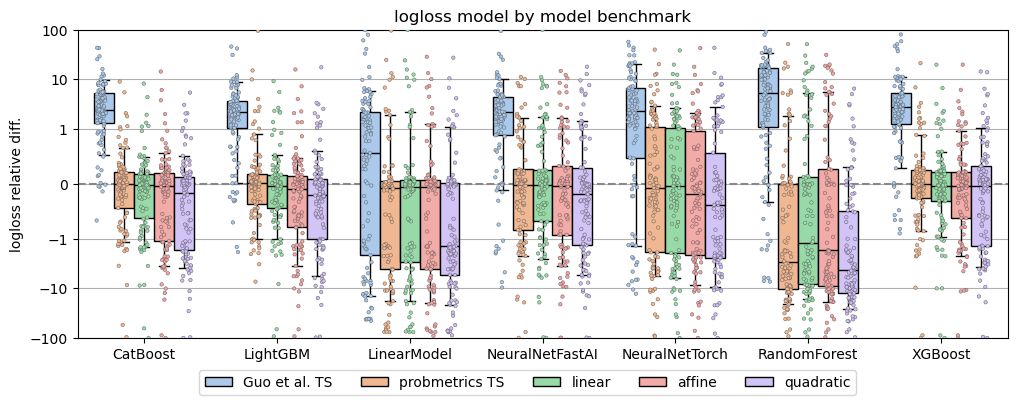

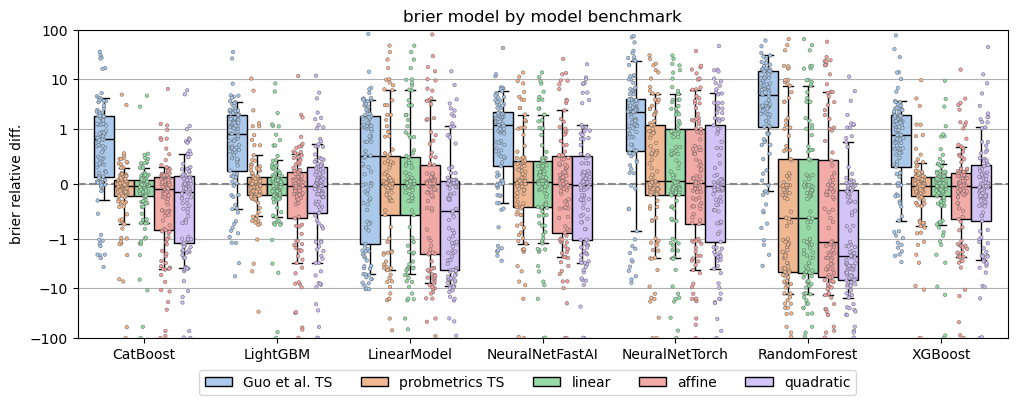

In [11]:
for metric in ['logloss', 'brier']:

    table = pd.DataFrame(columns=['hue', 'label', 'value'])
    for i in range(len(df)):
        table.loc[len(table)] = ['Guo et al. TS', df.iloc[i].model, df.iloc[i][f'guo_ts_{metric}_rel']]
        table.loc[len(table)] = ['probmetrics TS', df.iloc[i].model, df.iloc[i][f'prob_ts_{metric}_rel']]
        table.loc[len(table)] = ['linear', df.iloc[i].model, df.iloc[i][f'ts_{metric}_rel']]
        table.loc[len(table)] = ['affine', df.iloc[i].model, df.iloc[i][f'as_{metric}_rel']]
        table.loc[len(table)] = ['quadratic', df.iloc[i].model, df.iloc[i][f'qs_{metric}_rel']]

    fig, ax = plt.subplots(figsize=(12,4))
    plot_barscatter_ax(ax, table, title=f'{metric} model by model benchmark', ylabel=f'{metric} relative diff.')
    plt.ylim((-100.0, 100.0))

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.figlegend(handles, ('Guo et al. TS', 'probmetrics TS', 'linear', 'affine', 'quadratic'), loc='lower center', bbox_to_anchor=(0.5, -.05), ncol=6)

    plt.savefig(f'figures/binary_model_benchmark_{metric}.pdf', bbox_inches='tight')
    plt.show()